# NFL Elimination Picks 2024

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2024.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'DET': 8.6,
 'GB': 7.2,
 'BAL': 6.9,
 'BUF': 6.6,
 'PHI': 4.7,
 'KC': 4.0,
 'MIN': 3.5,
 'TB': 2.4,
 'SF': 2.3,
 'HOU': 1.1,
 'WSH': 1.0,
 'LAR': 1.0,
 'PIT': 0.9,
 'MIA': 0.7,
 'CIN': 0.3,
 'LAC': 0.2,
 'ARI': 0.1,
 'NYJ': -0.6,
 'SEA': -0.9,
 'DEN': -1.1,
 'ATL': -1.6,
 'CHI': -1.9,
 'CLE': -2.0,
 'TEN': -2.1,
 'IND': -2.7,
 'LV': -3.5,
 'NE': -4.2,
 'DAL': -4.7,
 'JAX': -6.5,
 'NO': -7.5,
 'NYG': -8.7,
 'CAR': -9.2}

In [7]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = [
    "BUF", # week 1
    "BAL", # week 2
    "SEA", # week 3
    "SF",  # week 4
    "CHI", # week 5
    "PHI", # week 6
    "WSH", # week 7
    "DEN", # week 8
    "CIN", # week 9
    "LAC", # week 10
    "DET", # week 11
    "HOU", # week 12
    "KC",  # week 13
    "TB",  # week 14
    "ARI", # week 15
    "GB",  # week 16
]

HOME_POWER_BUMP = 3.0

for n in range(1_000_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    # picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness

new high score, round      2406, fitness=+14.8
new high score, round     21234, fitness=+77.3
new high score, round    215448, fitness=+119.1


In [8]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff +10.2 - picking MIA (+0.7+H) over JAX (-6.5  )
week  2: diff +12.9 - picking GB  (+7.2+H) over IND (-2.7  )
week  3: diff  +6.6 - picking NYJ (-0.6+H) over NE  (-4.2  )
week  4: diff  +9.5 - picking SF  (+2.3+H) over NE  (-4.2  )
week  5: diff  +6.0 - picking WSH (+1.0+H) over CLE (-2.0  )
week  6: diff  +6.9 - picking TB  (+2.4  ) over NO  (-7.5+H)
week  7: diff  +7.5 - picking LAR (+1.0+H) over LV  (-3.5  )
week  8: diff +12.6 - picking PIT (+0.9+H) over NYG (-8.7  )
week  9: diff  +5.0 - picking ARI (+0.1+H) over CHI (-1.9  )
week 10: diff  +5.3 - picking LAC (+0.2+H) over TEN (-2.1  )
week 11: diff +18.1 - picking DET (+8.6+H) over JAX (-6.5  )
week 12: diff  +2.4 - picking MIN (+3.5  ) over CHI (-1.9+H)
week 13: diff +10.5 - picking KC  (+4.0+H) over LV  (-3.5  )
week 14: diff  +2.6 - picking BUF (+6.6  ) over LAR (+1.0+H)
week 15: diff  +3.4 - picking HOU (+1.1+H) over MIA (+0.7  )
week 16: diff  +5.3 - picking CIN (+0.3+H) over CLE (-2.0  )
week 17: diff +12.4 - pi

[10.2,
 12.9,
 6.6,
 9.5,
 6.0,
 6.9,
 7.5,
 12.6,
 5.0,
 5.300000000000001,
 18.1,
 2.4000000000000004,
 10.5,
 2.5999999999999996,
 3.4000000000000004,
 5.3,
 12.4,
 11.9]

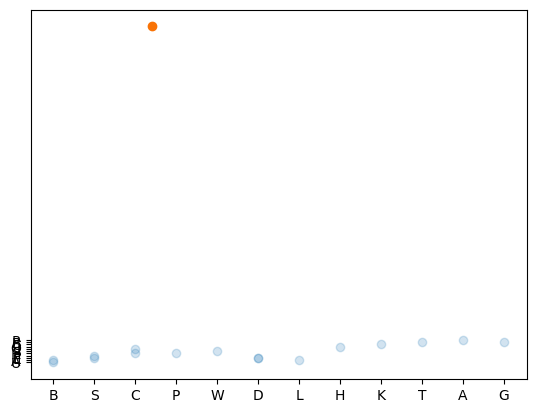

In [9]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <Axes: xlabel='Week', ylabel='Pick to Win'>)

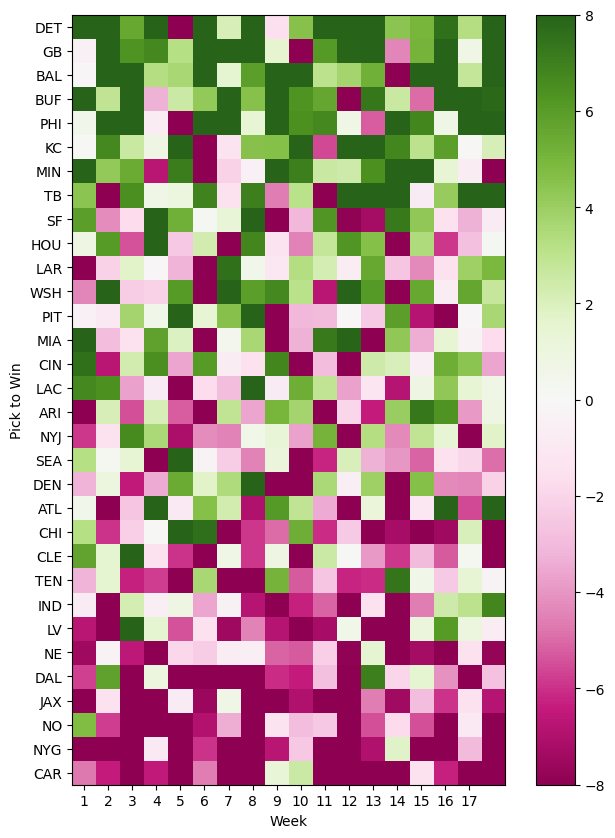

In [10]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [11]:
tuned_home_bump = 3  # default is 3

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": picks
}

In [12]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [13]:
pp.describe_pick()

week 17: diff  +3.9 - picking LAR (+1.0+H) over ARI (+0.1  )
week 18: diff +10.6 - picking ATL (-1.6+H) over CAR (-9.2  )


In [14]:
pprev.describe_pick()

week 17: diff  +3.9 - picking LAR (+1.0+H) over ARI (+0.1  )
week 18: diff +10.6 - picking ATL (-1.6+H) over CAR (-9.2  )


In [15]:
pprand.describe_pick()

week 17: diff  +3.9 - picking LAR (+1.0+H) over ARI (+0.1  )
week 18: diff +10.6 - picking ATL (-1.6+H) over CAR (-9.2  )


In [16]:
pplg.describe_pick()

week 17: diff  +3.9 - picking LAR (+1.0+H) over ARI (+0.1  )
week 18: diff +10.6 - picking ATL (-1.6+H) over CAR (-9.2  )


In [ ]:
def check_until_when(done_flag, best_q, trial_counter=None, permuter=None, method_name="random_greedy"):
    global ppkwargs
    if permuter is None:
        permuter = pick.Permuter(**ppkwargs)

    best_picks = []
    best_fitness = -100
    trials = 0
    while not done_flag.is_set():
        permuter.pick = getattr(permuter, method_name)()

        if permuter.fitness > best_fitness:
            best_picks = permuter.pick
            best_fitness = permuter.fitness
            best_q.put((best_picks, best_fitness))
        trials += 1
        
    if trial_counter is not None:
        with trial_counter.get_lock():
            trial_counter.value += trials
    return trials

In [ ]:
class TestFlag:
    def __init__(self, n_checks=1000):
        self.remaining = n_checks
    def is_set(self):
        self.remaining -= 1
        return self.remaining <= 0
        
test_q = queue.Queue()
start = time.monotonic()
trials = check_until_when(TestFlag(40_000), test_q)
elapsed = time.monotonic() - start
print(f"{trials/elapsed/1000:0.3f}k trials/sec over {elapsed:0.3f} sec")

In [ ]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(done_flag, new_best_q, trial_counter))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

## FiveThirtyEight Elo Data

This data is dead post ABC acquisition. 😞

## Betting lines?

Could use data from sport betting websites; the further out games may not be as well trod, but it could ground the calculations for the current week.